In [0]:
#데이터 직접 업로드 하는 경우 하기 코드 사용.
#from google.colab import files
#uploaded = files.upload()

#1. 공모 배경

KT 아현지사 화재 사고로 인해 유무선전화의 통신장애가 발생했던 적이 있었다. 이와 같이 통신이 불통이 되는  상황은 의료관련 위급상황이 발생했을 때 큰 문제가 될 수 있으며, 자칫 위급 환자를 죽음으로 내몰거나 잘못된 대처를 할 확률이 높아지게 된다.

#2. 활용 데이터 정의

2018년 의료기관 통화건수와 통화가 행해진 날짜, 위치 정보, 성별, 나이대 등을 기록한 데이터와의 데이터 융합을 통해 분석을 효과적으로 할 수 있을 것이라고 생각한다.

http://www.bigdatahub.co.kr
전국 의료기관 이용 통화량

https://data.kma.go.kr/cmmn/main.do
기상자료개방포털

http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2218&srvType=S&serviceKind=1
일별평균대기오염도_2018.xlsx
서울시 열린데이터광장

#3. 데이터 처리 방안 및 활용 분석 기법 

1)날씨 데이터 :

날씨 데이터셋을 가져와 확인을 해 본 결과 Not Applicable (이하 Nan) 로 입력되어 있는 데이터가 존재하였다. 하여 모든 Nan을 0으로 바꾸는 작업을 시도하려 하였으나 몇며 nan의 경우 0으로 변환시 분석 결과에 오류를 줄 수 있을 것으로 생각되었다. 하여 각 변수들의 특성을 고려하여 0과 평균을 섞어 사용하였다.

Nan 확인결과 하기 Variable들의 Nan 갯수는 하기와 같음.
Imputation 하는 것이 제일 쉽지만 그렇게 하면 데이터 갯수가 줄어든다...


안개 계속시간(hr)            357 -> 0 으로 변환.

합계 3시간 신적설(cm)         353 -> 0으로 변환.

일 최심신적설(cm)            353 -> 0으로 변환.

일 최심신적설 시각(hhmi)       353 -> 해당 변수를 제거하였다.

일 최심적설(cm)             344 -> 0으로 채워도 될듯

일 최심적설 시각(hhmi)        344 ->  해당 변수를 제거하였다.

1시간 최다 강수량 시각(hhmi)    300 ->  해당 변수를 제거하였다.

10분 최다강수량 시각(hhmi)     300 ->  해당 변수를 제거하였다.

1시간 최다강수량(mm)          280 -> 0 변환

10분 최다 강수량(mm)         280 -> 0 변환

일강수량(mm)               237-> 0 변환

강수 계속시간(hr)            237 -> 강수 계속시간이 0 이면 강수가 없다는 뜻이므로 가능

9-9강수(mm)              234 -> 0mm란 뜻이므로 0 변환 가능?

기사                     115 -> ***단순 기사 데이터이므로 삭제.***

합계 일조 시간(hr)             4 -> 일조시간 0이면 일조가 없었단 뜻으로 해석가능

합계 일사(MJ/m2)             3 -> 0 가능

평균 10cm 지중온도(°C)         2  -> ***평균 사용하여 대체*** 

1시간 최다일사 시각(hhmi)        2 -> 칼럽 드랍

1시간 최다일사량(MJ/m2)         2 -> 0으로 대체

평균 20cm 지중온도(°C)         2 ->***평균 사용하여 대체***

평균 30cm 지중온도(°C)         2 -> ***평균 사용하여 대체***

평균 5cm 지중온도(°C)          2 ***평균 사용하여 대체***

최저 초상온도(°C)              1 ->***평균 사용하여 대체***



2) 의료기관 통화 데이터

Medical 데이터의 경우는 SKT Data Hub에서 의료기관 통화건수 데이터를 다운받았다.

2018년의 데이터를 받았으며, 데이터는 '서울특별시'로만 한정하여 작업하였다

Medical_seoul에는 Nan 데이터가 없으므로 그대로 진행 가능할 것 같다.

***Medical Data 특징?***
남자보다 여자가 통화하는 건수가 더 많다.

강남구에서 전화하는 인구가 타 지역에서 전화하는 인구보다 압도적임 -> 이하 서초구, 중구 순.

30대 -> 40대 -> 50대 -> 60대 -> 20대 -> 10대 순으로 전화하는 연령이 줄어든다.

월요일에 의료기관으로 거는 전화가 많은 편이며, 월 -> 화 -> 수 -> 목 -> 금 -> 토 -> 일 순으로 감소함.

->토요일은 평일보다 병원시간이 적은 경우가 많고, 일요일의 경우는 쉬는 병원이 많은 편이다. 월요일에 전화건수가 높은 이유를 토, 일에 밀린 업무를 월요일에 하는 식이 아닐까.

3) Air Polution Data


###활용 분석 기법

Linear Regression

Decision Tree

Gradient Boosted Tree

이 3개의 분석 기법들을 사용해 MSE와 R^2를 각각 확인하였다.
Gradient Boosted Tree 의 경우는 Overfitting에 주의하였다.

#4. 분석 결과 

Gradient Boosted Tree 를 이용한 분석 방법이 MSE를 획기적으로 줄이고 R^2는 획기적으로 높힘.

#5. 서비스 활용 방안

기상청 날씨 데이터, Air Polution 데이터, 그리고 의료기관 데이터를 토대로 최신 데이터를 반영한 예상 의료기관 통화건수 정보를 제공할 수 있게 된다.

#6. 서비스 기대효과

각종 의료기관에 해당 예측정보를 제공한다.

1) 날씨 변화에 따른 바쁜 시기 예측을 통해 바쁜 시기에 필요 의료 인원 일시적 증강 및 충원. 위급상황에 대비 가능.

2) 통화량이 많은 지역에 기지국 및 추가 기기등을 설치하여 위급상황등에 대비하여 통화관련 문제가 없도록 예방


##Data Loading - Google Cloud

구글 코랩과  구글 드라이브를 서로 연동하여 데이터는 구글 드라이브에 따로 저장한 후 가져왔다. 그외 그래프를 위한 한글폰트 설치 역시 진행을 하였다.

In [2]:
#Use below if Google Drive is not linked.
#한번 껏다 켤 때마다 해야 함.
#Maybe this will work on Jupyter notebook.
# 이메일  fighger@gmail.com
# 비번 Uncle!21

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

!ls "/gdrive/My Drive"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
 비자
 휴대폰
 부동산
 회사코딩
'01 - 술이 문제야 (Drunk On Love).mp3'
'01 - 열대야 (Fever).mp3'
'01. Love Tonight.mp3'
'01. 헤어져줘서 고마워 (Thank you for Goodbye).mp3'
'03 - 비가 내리는 날에는.mp3'
'20180130 Training List.pdf'
 20180224_020112.jpg
 20180426_214711.jpg
 20180426_214721.jpg
 참가신청서_2018.docx
 20190709_144530.jpg
 20190709_144534.jpg
'채태주2725-8345 저용량.jpg'
 66a4e0fb821c0d23054b52db2fcc5743.mp3
 address-change.pdf
'ADSP 자격

In [3]:
!ls "/gdrive/My Drive/competition/weather"

'~$019 날씨 빅데이터 콘테스트] 서약서_공모 요약서_뜨거운형제.docx'
 일별평균대기오염도_2018.csv
 일별평균대기오염도_2018.xlsx
'[2019 날씨 빅데이터 콘테스트] 서약서_공모 요약서_뜨거운형제.docx'
'[2019 날씨 빅데이터 콘테스트] 서약서_공모 요약서.docx'
'[2019 날씨 빅데이터 콘테스트] 서약서_공모 요약서.hwp'
'데이터 사용방법 매뉴얼(2019 날씨 빅데이터 콘테스트).pdf'
 CALL_HOSP_01MONTH.csv
 CALL_HOSP_02MONTH.csv
 CALL_HOSP_03MONTH.csv
 CALL_HOSP_04MONTH.csv
 CALL_HOSP_05MONTH.csv
 CALL_HOSP_06MONTH.csv
 CALL_HOSP_07MONTH.csv
 CALL_HOSP_08MONTH.csv
 CALL_HOSP_09MONTH.csv
 CALL_HOSP_10MONTH.csv
 CALL_HOSP_11MONTH.csv
 CALL_HOSP_12MONTH.csv
 correlation.csv
 correlation.xlsx
'공모안 - 뜨거운형제들.docx'
'Logistic Reg 논문.pdf'
 test.csv
 test_output2.csv
 test_output.csv
 test_seoul.csv
'Useful Variables.txt'
 서약서_공모_요약서.zip


In [0]:
import pandas as pd # basic needed
import seaborn as sns #for plots, etc.
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#!pip install statsmodels
#for linear regression
#currently not working
#statsmodels is not working on new scipy 1.2

#Import necassary packages for regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from pandas import Series

In [5]:
mpl.rcParams['axes.unicode_minus'] = False
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))
font_list[:10]


!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

nanum_font

# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

current_font()

# 우선 fm._rebuild() 를 해주고
fm._rebuild()

mpl.rcParams['axes.unicode_minus'] = False

버전:  3.0.3
설치 위치:  /usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
설정 파일 위치:  /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc
16
Selecting previously unselected package fonts-nanum.
(Reading database ... 130963 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up

##Data Import - Load CSV Files

In [0]:
#Python will not allow ANSI.
#Python will not allow utf-8 for korean lan.
#use euc-kr for korean language

#dataset = pd.read_csv("/gdrive/My Drive/competition/weather/test.csv",sep=',',encoding='euc_kr')
dataset_seoul = pd.read_csv("/gdrive/My Drive/competition/weather/test_seoul.csv",sep=',', encoding='euc_kr')

med1 = pd.read_csv("/gdrive/My Drive/competition/weather/CALL_HOSP_01MONTH.csv",sep=',')
med2 = pd.read_csv("/gdrive/My Drive/competition/weather/CALL_HOSP_02MONTH.csv",sep=',')
med3 = pd.read_csv("/gdrive/My Drive/competition/weather/CALL_HOSP_03MONTH.csv",sep=',')
med4 = pd.read_csv("/gdrive/My Drive/competition/weather/CALL_HOSP_04MONTH.csv",sep=',')
med5 = pd.read_csv("/gdrive/My Drive/competition/weather/CALL_HOSP_05MONTH.csv",sep=',')
med6 = pd.read_csv("/gdrive/My Drive/competition/weather/CALL_HOSP_06MONTH.csv",sep=',')
med7 = pd.read_csv("/gdrive/My Drive/competition/weather/CALL_HOSP_07MONTH.csv",sep=',')
med8 = pd.read_csv("/gdrive/My Drive/competition/weather/CALL_HOSP_08MONTH.csv",sep=',')
med9 = pd.read_csv("/gdrive/My Drive/competition/weather/CALL_HOSP_09MONTH.csv",sep=',')
med10 = pd.read_csv("/gdrive/My Drive/competition/weather/CALL_HOSP_10MONTH.csv",sep=',')
med11 = pd.read_csv("/gdrive/My Drive/competition/weather/CALL_HOSP_11MONTH.csv",sep=',')
med12 = pd.read_csv("/gdrive/My Drive/competition/weather/CALL_HOSP_12MONTH.csv",sep=',')

air = pd.read_csv("/gdrive/My Drive/competition/weather/일별평균대기오염도_2018.csv", sep = ',', encoding='euc_kr')

##Dataset_seoul

Dataset_seoul의 경우 서울의 2018년도 날씨 데이터를 https://dta.kma.go.kr/cmmn/main.do
기상자료개방포털에서 가져왔다.

데이터셋을 가져와 확인을 해 본 결과 Not Applicable (이하 Nan) 로 입력되어 있는 데이터가 존재하였으며, 모든 Nan을 0으로 바꾸는 작업을 시도하려 하였으나 각 변수들의 특성을 고려하여 결정해야 할 것 같아 0과 평균을 섞어 사용하였다.


In [0]:
#dataset_seoul.head()
#지점 설정이 번호로만 되어 있어 문제가 있음.
#서울특별시로만 제한하여 사용함.

In [8]:
dataset_seoul.isna().sum().sort_values(ascending = False)

#Will only use 2018 data, so may need to export data again.
#print("start date: ", dataset_seoul.일시.min())
#print("end date: ", dataset_seoul.일시.max())
#print("number of days: ",len(dataset_seoul))
#print("number of columns: ", len(dataset_seoul.columns))
#print("\n")
#print("number of NANs in each variable: ")
#print(dataset_seoul.isna().sum().sort_values(ascending = False))

안개 계속시간(hr)            357
합계 3시간 신적설(cm)         353
일 최심신적설(cm)            353
일 최심신적설 시각(hhmi)       353
일 최심적설(cm)             344
일 최심적설 시각(hhmi)        344
1시간 최다 강수량 시각(hhmi)    300
10분 최다강수량 시각(hhmi)     300
1시간 최다강수량(mm)          280
10분 최다 강수량(mm)         280
일강수량(mm)               237
강수 계속시간(hr)            237
9-9강수(mm)              234
기사                     115
합계 일조 시간(hr)             4
합계 일사(MJ/m2)             3
평균 10cm 지중온도(°C)         2
1시간 최다일사 시각(hhmi)        2
1시간 최다일사량(MJ/m2)         2
평균 20cm 지중온도(°C)         2
평균 30cm 지중온도(°C)         2
평균 5cm 지중온도(°C)          2
최저 초상온도(°C)              1
최대 풍속 풍향(16방위)           0
최대 순간풍속 시각(hhmi)         0
최대 순간 풍속 풍향(16방위)        0
최대 풍속 시각(hhmi)           0
평균 풍속(m/s)               0
최대 풍속(m/s)               0
최저기온 시각(hhmi)            0
                      ... 
최고기온(°C)                 0
일시                       0
평균기온(°C)                 0
최다풍향(16방위)               0
최저기온(°C)                 0
최고기온 시각(hhmi)            0
풍

Nan 확인결과 하기 Variable들의 Nan 갯수는 하기와 같음.
Imputation 하는 것이 제일 쉽지만 그렇게 하면 데이터 갯수가 줄어든다...


안개 계속시간(hr)            357 -> 0으로 채워도 상관없음.

합계 3시간 신적설(cm)         353 -> 0으로 채워도 될듯.

일 최심신적설(cm)            353 -> 0으로 채워도 될듯.

일 최심신적설 시각(hhmi)       353 -> 제거

일 최심적설(cm)             344 -> 0으로 채워도 될듯

일 최심적설 시각(hhmi)        344 ->  제거

1시간 최다 강수량 시각(hhmi)    300 ->  제거

10분 최다강수량 시각(hhmi)     300 ->  제거

1시간 최다강수량(mm)          280 -> 0 변환 -> 최다강수량 0이라는 뜻이므로 가능

10분 최다 강수량(mm)         280 -> 최다강수량 0이라는 뜻이므로 0 변환 가능

일강수량(mm)               237 -> 일강수량 0mm라는 뜻이므로 0 변환 가능

강수 계속시간(hr)            237 -> 강수 계속시간이 0 이면 강수가 없다는 뜻이므로 가능

9-9강수(mm)              234 -> 0mm란 뜻이므로 0 변환 가능?

기사                     115 -> ***단순 기사 데이터이므로 삭제.***

합계 일조 시간(hr)             4 -> 일조시간 0이면 일조가 없었단 뜻으로 해석가능

합계 일사(MJ/m2)             3 -> 0 가능

평균 10cm 지중온도(°C)         2  -> ***평균 사용하여 대체*** 

1시간 최다일사 시각(hhmi)        2 -> 칼럽 드랍

1시간 최다일사량(MJ/m2)         2 -> 0으로 대체

평균 20cm 지중온도(°C)         2 ->***평균 사용하여 대체***

평균 30cm 지중온도(°C)         2 -> ***평균 사용하여 대체***

평균 5cm 지중온도(°C)          2 ***평균 사용하여 대체***

최저 초상온도(°C)              1 ->***평균 사용하여 대체***

따라서 해당 변수들을 재확인하여 nan을 0으로 바꾸는 데에 이상이 없는지 확인이 필요함.

In [9]:
list(dataset_seoul)

['지점',
 '일시',
 '평균기온(°C)',
 '최저기온(°C)',
 '최저기온 시각(hhmi)',
 '최고기온(°C)',
 '최고기온 시각(hhmi)',
 '강수 계속시간(hr)',
 '10분 최다 강수량(mm)',
 '10분 최다강수량 시각(hhmi)',
 '1시간 최다강수량(mm)',
 '1시간 최다 강수량 시각(hhmi)',
 '일강수량(mm)',
 '최대 순간 풍속(m/s)',
 '최대 순간 풍속 풍향(16방위)',
 '최대 순간풍속 시각(hhmi)',
 '최대 풍속(m/s)',
 '최대 풍속 풍향(16방위)',
 '최대 풍속 시각(hhmi)',
 '평균 풍속(m/s)',
 '풍정합(100m)',
 '최다풍향(16방위)',
 '평균 이슬점온도(°C)',
 '최소 상대습도(%)',
 '최소 상대습도 시각(hhmi)',
 '평균 상대습도(%)',
 '평균 증기압(hPa)',
 '평균 현지기압(hPa)',
 '최고 해면기압(hPa)',
 '최고 해면기압 시각(hhmi)',
 '최저 해면기압(hPa)',
 '최저 해면기압 시각(hhmi)',
 '평균 해면기압(hPa)',
 '가조시간(hr)',
 '합계 일조 시간(hr)',
 '1시간 최다일사 시각(hhmi)',
 '1시간 최다일사량(MJ/m2)',
 '합계 일사(MJ/m2)',
 '일 최심신적설(cm)',
 '일 최심신적설 시각(hhmi)',
 '일 최심적설(cm)',
 '일 최심적설 시각(hhmi)',
 '합계 3시간 신적설(cm)',
 '평균 전운량(1/10)',
 '평균 중하층운량(1/10)',
 '평균 지면온도(°C)',
 '최저 초상온도(°C)',
 '평균 5cm 지중온도(°C)',
 '평균 10cm 지중온도(°C)',
 '평균 20cm 지중온도(°C)',
 '평균 30cm 지중온도(°C)',
 '0.5m 지중온도(°C)',
 '1.0m 지중온도(°C)',
 '1.5m 지중온도(°C)',
 '3.0m 지중온도(°C)',
 '5.0m 지중온도(°C)',
 '합계 대형증발량(mm)',
 '합계 소형

In [0]:
#As of 6/3/2019 : 일괄변환을 하면 안되고 해당 Column 몇개를 지우고 작업을 해야 할 것 같다.
dataset_seoul = dataset_seoul.drop(['1시간 최다일사 시각(hhmi)', '지점','일 최심신적설 시각(hhmi)','일 최심적설 시각(hhmi)','1시간 최다 강수량 시각(hhmi)','10분 최다강수량 시각(hhmi)','기사'], axis=1)


In [11]:
dataset_seoul['안개 계속시간(hr)'] = dataset_seoul['안개 계속시간(hr)'].fillna(0)
dataset_seoul['합계 3시간 신적설(cm)'] = dataset_seoul['합계 3시간 신적설(cm)'].fillna(0)
dataset_seoul['일 최심신적설(cm)'] = dataset_seoul['일 최심신적설(cm)'].fillna(0)
dataset_seoul['일 최심적설(cm)'] = dataset_seoul['일 최심적설(cm)'].fillna(0)
dataset_seoul['1시간 최다강수량(mm)'] = dataset_seoul['1시간 최다강수량(mm)'].fillna(0)
dataset_seoul['10분 최다 강수량(mm)'] = dataset_seoul['10분 최다 강수량(mm)'].fillna(0)
dataset_seoul['일강수량(mm)'] = dataset_seoul['일강수량(mm)'].fillna(0)
dataset_seoul['9-9강수(mm)'] = dataset_seoul['9-9강수(mm)'].fillna(0)
dataset_seoul['합계 일조 시간(hr)'] = dataset_seoul['합계 일조 시간(hr)'].fillna(0)
dataset_seoul['합계 일사(MJ/m2)'] = dataset_seoul['합계 일사(MJ/m2)'].fillna(0)
dataset_seoul['평균 10cm 지중온도(°C)'] = dataset_seoul['평균 10cm 지중온도(°C)'].fillna(dataset_seoul['평균 10cm 지중온도(°C)'].mean())
dataset_seoul['1시간 최다일사량(MJ/m2)'] = dataset_seoul['1시간 최다일사량(MJ/m2)'].fillna(0)
dataset_seoul['평균 20cm 지중온도(°C)'] = dataset_seoul['평균 20cm 지중온도(°C)'].fillna(dataset_seoul['평균 20cm 지중온도(°C)'].mean())
dataset_seoul['평균 30cm 지중온도(°C)'] = dataset_seoul['평균 30cm 지중온도(°C)'].fillna(dataset_seoul['평균 30cm 지중온도(°C)'].mean())
dataset_seoul['평균 5cm 지중온도(°C)'] = dataset_seoul['평균 5cm 지중온도(°C)'].fillna(dataset_seoul['평균 5cm 지중온도(°C)'].mean())
dataset_seoul['최저 초상온도(°C)'] = dataset_seoul['최저 초상온도(°C)'].fillna(dataset_seoul['최저 초상온도(°C)'].mean())
dataset_seoul['강수 계속시간(hr)'] = dataset_seoul['강수 계속시간(hr)'].fillna(0)

dataset_seoul.isna().sum().sort_values(ascending = False)
dataset_seoul.head(5)

,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),1시간 최다강수량(mm),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),최소 상대습도 시각(hhmi),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다일사량(MJ/m2),합계 일사(MJ/m2),일 최심신적설(cm),일 최심적설(cm),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr)
0,2018-01-01,-1.3,-5.1,739,3.8,1538,0.0,0.0,0.0,0.0,7.0,320,1633,3.8,290,1634,1.4,1188,290,-13.9,19,1203,39.1,2.1,1016.8,1029.0,1058,1025.9,111,1027.8,9.6,8.3,1.10,6.14,0.0,0.0,0.0,1.0,0.9,-1.7,-11.5,-0.1,0.3,1.0,1.6,2.7,5.9,9.0,15.5,17.6,1.1,1.6,0.0,0.0
1,2018-01-02,-1.8,-4.3,2348,1.8,1345,0.0,0.0,0.0,0.0,8.5,270,1256,4.9,290,1355,1.8,1573,290,-14.1,19,1357,42.0,2.2,1018.1,1030.7,2350,1027.6,1514,1029.2,9.6,7.9,0.95,5.36,0.0,0.0,0.0,2.3,0.0,-2.3,-9.4,-0.3,0.3,1.0,1.6,2.7,5.8,8.9,15.4,17.6,1.3,1.9,0.0,0.0
2,2018-01-03,-4.7,-7.1,804,-0.4,1550,0.0,0.0,0.0,0.0,6.6,320,1340,3.5,270,1108,2.2,1943,290,-15.8,28,1539,42.3,1.8,1019.9,1033.1,1028,1029.8,1518,1031.1,9.7,8.6,1.13,6.56,0.0,0.0,0.0,3.6,0.0,-3.4,-10.6,-0.8,0.0,0.9,1.5,2.6,5.7,8.9,15.3,17.5,1.0,1.5,0.0,0.0
3,2018-01-04,-4.7,-8.7,751,-0.7,1519,0.0,0.0,0.0,0.0,5.8,320,547,3.5,320,550,1.4,1168,290,-15.6,31,1312,43.0,1.8,1016.5,1031.7,300,1023.7,2344,1027.6,9.7,6.2,0.92,4.73,0.0,0.0,0.0,6.5,2.9,-3.3,-13.3,-1.3,-0.3,0.7,1.4,2.6,5.6,8.7,15.2,17.5,0.8,1.1,0.0,0.0
4,2018-01-05,-3.0,-5.6,306,1.6,1530,0.0,0.0,0.0,0.0,8.0,250,1443,3.6,270,1712,1.7,1450,290,-12.5,32,1504,48.4,2.4,1010.3,1023.8,1,1019.2,1403,1021.3,9.7,8.2,1.01,5.96,0.0,0.0,0.0,3.6,0.8,-2.6,-11.6,-1.0,-0.3,0.6,1.3,2.6,5.5,8.7,15.1,17.5,0.9,1.3,0.0,0.0


In [12]:
dataset_seoul2 = dataset_seoul.fillna(0)
print(dataset_seoul2.head(5))

           일시  평균기온(°C)  최저기온(°C)  ...  합계 소형증발량(mm)  9-9강수(mm)  안개 계속시간(hr)
0  2018-01-01      -1.3      -5.1  ...           1.6        0.0          0.0
1  2018-01-02      -1.8      -4.3  ...           1.9        0.0          0.0
2  2018-01-03      -4.7      -7.1  ...           1.5        0.0          0.0
3  2018-01-04      -4.7      -8.7  ...           1.1        0.0          0.0
4  2018-01-05      -3.0      -5.6  ...           1.3        0.0          0.0

[5 rows x 54 columns]


In [13]:
#NAN 재확인
print(dataset_seoul2.isna().sum().sort_values(ascending = False))
print(dataset_seoul2[dataset_seoul2.일시 == 0])


안개 계속시간(hr)          0
최대 풍속(m/s)           0
평균 현지기압(hPa)         0
평균 증기압(hPa)          0
평균 상대습도(%)           0
최소 상대습도 시각(hhmi)     0
최소 상대습도(%)           0
평균 이슬점온도(°C)         0
최다풍향(16방위)           0
풍정합(100m)            0
평균 풍속(m/s)           0
최대 풍속 시각(hhmi)       0
최대 풍속 풍향(16방위)       0
최대 순간풍속 시각(hhmi)     0
9-9강수(mm)            0
최대 순간 풍속 풍향(16방위)    0
최대 순간 풍속(m/s)        0
일강수량(mm)             0
1시간 최다강수량(mm)        0
10분 최다 강수량(mm)       0
강수 계속시간(hr)          0
최고기온 시각(hhmi)        0
최고기온(°C)             0
최저기온 시각(hhmi)        0
최저기온(°C)             0
평균기온(°C)             0
최고 해면기압(hPa)         0
최고 해면기압 시각(hhmi)     0
최저 해면기압(hPa)         0
최저 해면기압 시각(hhmi)     0
합계 소형증발량(mm)         0
합계 대형증발량(mm)         0
5.0m 지중온도(°C)        0
3.0m 지중온도(°C)        0
1.5m 지중온도(°C)        0
1.0m 지중온도(°C)        0
0.5m 지중온도(°C)        0
평균 30cm 지중온도(°C)     0
평균 20cm 지중온도(°C)     0
평균 10cm 지중온도(°C)     0
평균 5cm 지중온도(°C)      0
최저 초상온도(°C)          0
평균 지면온도(°C)          0
평균 중하층운량(1/

##Medical Data Part

Medical 데이터의 경우는 SKT Data Hub에서 의료기관 통화건수 데이터를 다운받았다. 

2018년의 데이터를 받았으며, 데이터는 '서울특별시'로만 한정하여 작업하였다.

In [0]:
medical = pd.concat([med1, med2, med3, med4, med5, med6, med7, med8, med9, med10, med11, med12], sort = True, ignore_index=True)
df = pd.DataFrame(data=list(enumerate(medical['일자'], start=0)), columns=['id','일자'])
df[['date']] = df[['일자']].applymap(str).applymap(lambda s: "{}-{}-{}".format(s[0:4], s[4:6],s[6:]))

In [15]:
medical = medical.assign(일시 = df.date)
print(medical.head(10))
print(medical.tail(10))

print(medical.dtypes)

  발신지_구   발신지_시도 발신지_읍면동 성별     연령 요일        일자  통화건수          일시
0     .  세종특별자치시     도담동  남    20대  월  20180101     5  2018-01-01
1     .  세종특별자치시    조치원읍  남    20대  월  20180101     5  2018-01-01
2     .  세종특별자치시    조치원읍  남    30대  월  20180101     5  2018-01-01
3     .  세종특별자치시     금남면  남    40대  월  20180101     5  2018-01-01
4     .  세종특별자치시    조치원읍  남    40대  월  20180101     5  2018-01-01
5     .  세종특별자치시     금남면  남    50대  월  20180101     5  2018-01-01
6     .  세종특별자치시     도담동  남    50대  월  20180101     5  2018-01-01
7     .  세종특별자치시     도담동  남  60대이상  월  20180101     5  2018-01-01
8     .  세종특별자치시     도담동  남    10대  월  20180101     5  2018-01-01
9     .  세종특별자치시     부강면  여    20대  월  20180101     5  2018-01-01
        발신지_구 발신지_시도 발신지_읍면동 성별     연령 요일        일자  통화건수          일시
4948726   횡성군    강원도     둔내면  여    30대  월  20181231     5  2018-12-31
4948727   횡성군    강원도     횡성읍  여    30대  월  20181231     5  2018-12-31
4948728   횡성군    강원도     둔내면  여    40대  월  20181231     5  2018-

In [16]:
medical = medical.drop(['일자'], axis=1)
medical.rename(index=str, columns={'date': '일시'}, inplace = True)
print(medical.columns)
print(medical.head())

Index(['발신지_구', '발신지_시도', '발신지_읍면동', '성별', '연령', '요일', '통화건수', '일시'], dtype='object')
  발신지_구   발신지_시도 발신지_읍면동 성별   연령 요일  통화건수          일시
0     .  세종특별자치시     도담동  남  20대  월     5  2018-01-01
1     .  세종특별자치시    조치원읍  남  20대  월     5  2018-01-01
2     .  세종특별자치시    조치원읍  남  30대  월     5  2018-01-01
3     .  세종특별자치시     금남면  남  40대  월     5  2018-01-01
4     .  세종특별자치시    조치원읍  남  40대  월     5  2018-01-01


In [17]:
medical_seoul = medical[medical.발신지_시도 == '서울특별시']
print(medical_seoul.head())

   발신지_구 발신지_시도 발신지_읍면동 성별   연령 요일  통화건수          일시
72   강남구  서울특별시     도곡동  남  10대  월     5  2018-01-01
73   강남구  서울특별시     역삼동  남  10대  월     5  2018-01-01
74   강남구  서울특별시     일원동  남  20대  월     5  2018-01-01
75   강남구  서울특별시     수서동  남  30대  월     5  2018-01-01
76   강남구  서울특별시     개포동  남  30대  월     5  2018-01-01


###Medical_seoul 데이터 확인....
Medical_seoul에는 Nan 데이터가 없으므로 그대로 진행 가능할 것 같다.

In [18]:
medical_seoul.isna().sum().sort_values(ascending = False)

일시         0
통화건수       0
요일         0
연령         0
성별         0
발신지_읍면동    0
발신지_시도     0
발신지_구      0
dtype: int64

In [19]:
medical_seoul['통화건수'].sum()

15826350

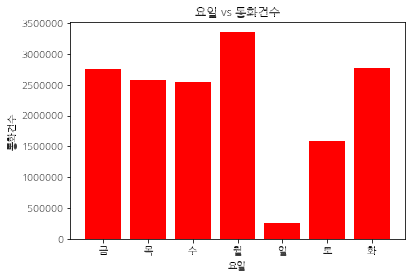

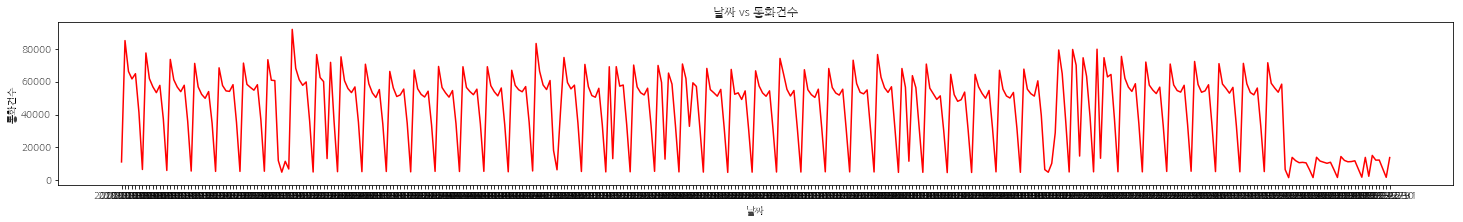

In [20]:
#Medical Data Plot


#요일별 통화건수
#월 > 화 > 금 > 목 > 수 > 토> 일
#주말보다 평일에 높은 통화건수

mseoul_day = medical_seoul.groupby(['요일'], as_index = False).sum()

x = mseoul_day['요일']

performance = mseoul_day['통화건수']
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, performance, color='red')
plt.xlabel("요일")
plt.ylabel("통화건수")
plt.title("요일 vs 통화건수")
plt.xticks(x_pos, x)
plt.show()

#일별 통화건수
#연말보다 연초에 통화가 더 많다
#통화건수는 매주 일정한 편이다.
#11월까지는 일정한 편이다. 12월에 급격하게 통화건수가 줄어든다.
#이거는 R로 하는게 더 낫겠다...

mseoul_date = medical_seoul.groupby(['일시'], as_index = False).sum()

x = mseoul_date['일시']

performance = mseoul_date['통화건수']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(25, 3))
plt.plot(x_pos, performance, color='red')
plt.xlabel("날짜")
plt.ylabel("통화건수")
plt.title("날짜 vs 통화건수")
plt.xticks(x_pos, x)
plt.show()


###Medical Data 특징?

1. 남자보다 여자가 통화하는 건수가 더 많다.

2. 강남구에서 전화하는 인구가 타 지역에서 전화하는 인구보다 압도적임 -> 이하 서초구, 중구 순.

3. 30대 -> 40대 -> 50대 -> 60대 -> 20대 -> 10대 순으로 전화하는 연령이 줄어든다.

4. 월요일에 의료기관으로 거는 전화가 많은 편이며, 월 -> 화 -> 수 -> 목 -> 금 -> 토 -> 일 순으로 감소함.

->토요일은 평일보다 병원시간이 적은 경우가 많고, 일요일의 경우는 쉬는 병원이 많은 편이다. 월요일에 전화건수가 높은 이유를 토, 일에 밀린 업무를 월요일에 하는 식이 아닐까.

### Air Polution data


In [21]:

print(air.head(10))
#print(list(air))

df2 = pd.DataFrame(data=list(enumerate(air['측정일시'], start=0)), columns=['id','측정일시'])
df2[['date']] = df2[['측정일시']].applymap(str).applymap(lambda s: "{}-{}-{}".format(s[0:4], s[4:6],s[6:]))

air = air.assign(일시 = df2.date)
print(air.head(10))
print(air.tail(10))

print(df2.head(10))


print(air.tail(10))
print(air.dtypes)

print(list(air))

air = air.drop(['측정일시'], axis=1)

print(air.head())
print(air.tail())
#air.rename(index=str, columns={'date': '일시'}, inplace = True)
#print(medical.columns)

       측정일시  측정소명  이산화질소농도(ppm)  ...  아황산가스(ppm)  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)
0  20180101   강남구         0.033  ...       0.006       34.0        22.0
1  20180101  강남대로         0.040  ...       0.006        NaN        17.0
2  20180101   강동구         0.038  ...       0.005       48.0        24.0
3  20180101  강변북로         0.033  ...       0.005       48.0        15.0
4  20180101   강북구         0.026  ...       0.004       38.0        18.0
5  20180101   강서구         0.036  ...       0.004        NaN        13.0
6  20180101  공항대로         0.045  ...       0.006       50.0        21.0
7  20180101   관악구         0.036  ...       0.008       38.0        23.0
8  20180101   광진구         0.037  ...       0.005       41.0        21.0
9  20180101   구로구         0.025  ...       0.007       47.0        28.0

[10 rows x 8 columns]
       측정일시  측정소명  이산화질소농도(ppm)  ...  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)          일시
0  20180101   강남구         0.033  ...       34.0        22.0  2018-01-01
1  20180101  강남대로         0.040  ...     

In [22]:
air = air.fillna(air.mean())

air_gu_date = air.groupby(['일시','측정소명'], as_index = False).mean()
print(air_gu_date.head())
print(air_gu_date.tail())

air_gu_date.rename(columns={'측정소명': '발신지_구'}, inplace = True)
print(air_gu_date.head())
print(air_gu_date.tail())

#25개의 구, 그리고 일별 평균 조합함....

print(air_gu_date.isna().sum().sort_values(ascending = False))
#NA가 있는 경우가 있음...

air_gu_date = air_gu_date.dropna()
print(air_gu_date.isna().sum().sort_values(ascending = False))

print(air_gu_date.head())
print(air_gu_date.tail())



           일시  측정소명  이산화질소농도(ppm)  ...  아황산가스(ppm)  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)
0  2018-01-01   강남구         0.033  ...       0.006  34.000000        22.0
1  2018-01-01  강남대로         0.040  ...       0.006  40.530034        17.0
2  2018-01-01   강동구         0.038  ...       0.005  48.000000        24.0
3  2018-01-01  강변북로         0.033  ...       0.005  48.000000        15.0
4  2018-01-01   강북구         0.026  ...       0.004  38.000000        18.0

[5 rows x 8 columns]
               일시  측정소명  이산화질소농도(ppm)  ...  아황산가스(ppm)  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)
12442  2018-12-31  청계천로         0.049  ...       0.005       39.0        31.0
12443  2018-12-31  한강대로         0.073  ...       0.004       52.0        34.0
12444  2018-12-31    행주         0.039  ...       0.004       60.0        30.0
12445  2018-12-31   홍릉로         0.031  ...       0.005       57.0        39.0
12446  2018-12-31   화랑로         0.032  ...       0.005       47.0        31.0

[5 rows x 8 columns]
           일시 발신지_구  이산화질소농도(ppm)  ...  아황산가

## Data Join -> Medical data and Weather data

Medical Data로 기본적인 정보를 보았으니 이제 합쳐서 본다.



In [23]:
dataset_seoul2.head()

,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),1시간 최다강수량(mm),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),최소 상대습도 시각(hhmi),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다일사량(MJ/m2),합계 일사(MJ/m2),일 최심신적설(cm),일 최심적설(cm),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr)
0,2018-01-01,-1.3,-5.1,739,3.8,1538,0.0,0.0,0.0,0.0,7.0,320,1633,3.8,290,1634,1.4,1188,290,-13.9,19,1203,39.1,2.1,1016.8,1029.0,1058,1025.9,111,1027.8,9.6,8.3,1.10,6.14,0.0,0.0,0.0,1.0,0.9,-1.7,-11.5,-0.1,0.3,1.0,1.6,2.7,5.9,9.0,15.5,17.6,1.1,1.6,0.0,0.0
1,2018-01-02,-1.8,-4.3,2348,1.8,1345,0.0,0.0,0.0,0.0,8.5,270,1256,4.9,290,1355,1.8,1573,290,-14.1,19,1357,42.0,2.2,1018.1,1030.7,2350,1027.6,1514,1029.2,9.6,7.9,0.95,5.36,0.0,0.0,0.0,2.3,0.0,-2.3,-9.4,-0.3,0.3,1.0,1.6,2.7,5.8,8.9,15.4,17.6,1.3,1.9,0.0,0.0
2,2018-01-03,-4.7,-7.1,804,-0.4,1550,0.0,0.0,0.0,0.0,6.6,320,1340,3.5,270,1108,2.2,1943,290,-15.8,28,1539,42.3,1.8,1019.9,1033.1,1028,1029.8,1518,1031.1,9.7,8.6,1.13,6.56,0.0,0.0,0.0,3.6,0.0,-3.4,-10.6,-0.8,0.0,0.9,1.5,2.6,5.7,8.9,15.3,17.5,1.0,1.5,0.0,0.0
3,2018-01-04,-4.7,-8.7,751,-0.7,1519,0.0,0.0,0.0,0.0,5.8,320,547,3.5,320,550,1.4,1168,290,-15.6,31,1312,43.0,1.8,1016.5,1031.7,300,1023.7,2344,1027.6,9.7,6.2,0.92,4.73,0.0,0.0,0.0,6.5,2.9,-3.3,-13.3,-1.3,-0.3,0.7,1.4,2.6,5.6,8.7,15.2,17.5,0.8,1.1,0.0,0.0
4,2018-01-05,-3.0,-5.6,306,1.6,1530,0.0,0.0,0.0,0.0,8.0,250,1443,3.6,270,1712,1.7,1450,290,-12.5,32,1504,48.4,2.4,1010.3,1023.8,1,1019.2,1403,1021.3,9.7,8.2,1.01,5.96,0.0,0.0,0.0,3.6,0.8,-2.6,-11.6,-1.0,-0.3,0.6,1.3,2.6,5.5,8.7,15.1,17.5,0.9,1.3,0.0,0.0


In [24]:
print(medical_seoul.head())
medical_seoul = medical_seoul.groupby(['일시', '발신지_구', '성별', '연령', '요일'],as_index=False).sum()
print(medical_seoul.head())
#medical_seoul = medical_seoul.drop(['발신지_시도'], axis = 1)

   발신지_구 발신지_시도 발신지_읍면동 성별   연령 요일  통화건수          일시
72   강남구  서울특별시     도곡동  남  10대  월     5  2018-01-01
73   강남구  서울특별시     역삼동  남  10대  월     5  2018-01-01
74   강남구  서울특별시     일원동  남  20대  월     5  2018-01-01
75   강남구  서울특별시     수서동  남  30대  월     5  2018-01-01
76   강남구  서울특별시     개포동  남  30대  월     5  2018-01-01
           일시 발신지_구 성별   연령 요일  통화건수
0  2018-01-01   강남구  남  10대  월    10
1  2018-01-01   강남구  남  20대  월    43
2  2018-01-01   강남구  남  30대  월    81
3  2018-01-01   강남구  남  40대  월    83
4  2018-01-01   강남구  남  50대  월    57


In [25]:
#air_gu_date
test = pd.merge(medical_seoul,dataset_seoul2, on='일시', how = 'outer')
print(test.head(15))

print(medical_seoul['통화건수'].sum())
print(test['통화건수'].sum())


            일시 발신지_구 성별  ... 합계 소형증발량(mm) 9-9강수(mm)  안개 계속시간(hr)
0   2018-01-01   강남구  남  ...          1.6       0.0          0.0
1   2018-01-01   강남구  남  ...          1.6       0.0          0.0
2   2018-01-01   강남구  남  ...          1.6       0.0          0.0
3   2018-01-01   강남구  남  ...          1.6       0.0          0.0
4   2018-01-01   강남구  남  ...          1.6       0.0          0.0
5   2018-01-01   강남구  남  ...          1.6       0.0          0.0
6   2018-01-01   강남구  여  ...          1.6       0.0          0.0
7   2018-01-01   강남구  여  ...          1.6       0.0          0.0
8   2018-01-01   강남구  여  ...          1.6       0.0          0.0
9   2018-01-01   강남구  여  ...          1.6       0.0          0.0
10  2018-01-01   강남구  여  ...          1.6       0.0          0.0
11  2018-01-01   강남구  여  ...          1.6       0.0          0.0
12  2018-01-01   강동구  남  ...          1.6       0.0          0.0
13  2018-01-01   강동구  남  ...          1.6       0.0          0.0
14  2018-01-01   강동구  남  

In [26]:
test_end = pd.merge(test, air_gu_date, on = ['발신지_구', '일시'], how = 'left') 

#test_end = test_end.dropna()
#air_gu_date 6월 자료가 빈약함. Average로 대체.

test_end = test_end.fillna(test_end.mean())


print(list(test_end))
print(test_end.head())
print(test_end.tail())
print(len(test_end))
print(len(test))

print(test_end['통화건수'].sum())

print(test_end.isna().sum().sort_values(ascending = False))
test = test_end

['일시', '발신지_구', '성별', '연령', '요일', '통화건수', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)', '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '1시간 최다강수량(mm)', '일강수량(mm)', '최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)', '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조 시간(hr)', '1시간 최다일사량(MJ/m2)', '합계 일사(MJ/m2)', '일 최심신적설(cm)', '일 최심적설(cm)', '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온도(°C)', '5.0m 지중온도(°C)', '합계 대형증발량(mm)', '합계 소형증발량(mm)', '9-9강수(mm)', '안개 계속시간(hr)', '이산화질소농도(ppm)', '오존농도(ppm)', '이산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']
         

In [27]:
#NAN 재확인
print(test.isna().sum().sort_values(ascending = False))
print(test.count())
#print(test.isna())

초미세먼지(㎍/㎥)           0
최고 해면기압 시각(hhmi)     0
평균 현지기압(hPa)         0
평균 증기압(hPa)          0
평균 상대습도(%)           0
최소 상대습도 시각(hhmi)     0
최소 상대습도(%)           0
평균 이슬점온도(°C)         0
최다풍향(16방위)           0
풍정합(100m)            0
평균 풍속(m/s)           0
최대 풍속 시각(hhmi)       0
최대 풍속 풍향(16방위)       0
최대 풍속(m/s)           0
최대 순간풍속 시각(hhmi)     0
최대 순간 풍속 풍향(16방위)    0
최대 순간 풍속(m/s)        0
일강수량(mm)             0
1시간 최다강수량(mm)        0
10분 최다 강수량(mm)       0
강수 계속시간(hr)          0
최고기온 시각(hhmi)        0
최고기온(°C)             0
최저기온 시각(hhmi)        0
최저기온(°C)             0
평균기온(°C)             0
통화건수                 0
요일                   0
연령                   0
성별                   0
                    ..
아황산가스(ppm)           0
이산화탄소농도(ppm)         0
오존농도(ppm)            0
이산화질소농도(ppm)         0
안개 계속시간(hr)          0
9-9강수(mm)            0
합계 소형증발량(mm)         0
합계 대형증발량(mm)         0
5.0m 지중온도(°C)        0
3.0m 지중온도(°C)        0
1.5m 지중온도(°C)        0
1.0m 지중온도(°C)        0
0.5m 지중온도(°

In [28]:
print(len(test))
print(test.head(10))



105950
           일시 발신지_구 성별     연령  ... 이산화탄소농도(ppm)  아황산가스(ppm)  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)
0  2018-01-01   강남구  남    10대  ...          0.6       0.006       34.0        22.0
1  2018-01-01   강남구  남    20대  ...          0.6       0.006       34.0        22.0
2  2018-01-01   강남구  남    30대  ...          0.6       0.006       34.0        22.0
3  2018-01-01   강남구  남    40대  ...          0.6       0.006       34.0        22.0
4  2018-01-01   강남구  남    50대  ...          0.6       0.006       34.0        22.0
5  2018-01-01   강남구  남  60대이상  ...          0.6       0.006       34.0        22.0
6  2018-01-01   강남구  여    10대  ...          0.6       0.006       34.0        22.0
7  2018-01-01   강남구  여    20대  ...          0.6       0.006       34.0        22.0
8  2018-01-01   강남구  여    30대  ...          0.6       0.006       34.0        22.0
9  2018-01-01   강남구  여    40대  ...          0.6       0.006       34.0        22.0

[10 rows x 65 columns]


In [29]:
#test['일시'] = pd.to_datetime(test['일시'])

#CSV로 Export
#export_csv = test.to_csv('/gdrive/My Drive/competition/weather/test_output.csv', index = None, header=True, encoding='ms949')
#Don't forget to add '.csv' at the end of the path

test.head()

,일시,발신지_구,성별,연령,요일,통화건수,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),1시간 최다강수량(mm),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),최소 상대습도 시각(hhmi),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다일사량(MJ/m2),합계 일사(MJ/m2),일 최심신적설(cm),일 최심적설(cm),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속시간(hr),이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,2018-01-01,강남구,남,10대,월,10,-1.3,-5.1,739,3.8,1538,0.0,0.0,0.0,0.0,7.0,320,1633,3.8,290,1634,1.4,1188,290,-13.9,19,1203,39.1,2.1,1016.8,1029.0,1058,1025.9,111,1027.8,9.6,8.3,1.1,6.14,0.0,0.0,0.0,1.0,0.9,-1.7,-11.5,-0.1,0.3,1.0,1.6,2.7,5.9,9.0,15.5,17.6,1.1,1.6,0.0,0.0,0.033,0.01,0.6,0.006,34.0,22.0
1,2018-01-01,강남구,남,20대,월,43,-1.3,-5.1,739,3.8,1538,0.0,0.0,0.0,0.0,7.0,320,1633,3.8,290,1634,1.4,1188,290,-13.9,19,1203,39.1,2.1,1016.8,1029.0,1058,1025.9,111,1027.8,9.6,8.3,1.1,6.14,0.0,0.0,0.0,1.0,0.9,-1.7,-11.5,-0.1,0.3,1.0,1.6,2.7,5.9,9.0,15.5,17.6,1.1,1.6,0.0,0.0,0.033,0.01,0.6,0.006,34.0,22.0
2,2018-01-01,강남구,남,30대,월,81,-1.3,-5.1,739,3.8,1538,0.0,0.0,0.0,0.0,7.0,320,1633,3.8,290,1634,1.4,1188,290,-13.9,19,1203,39.1,2.1,1016.8,1029.0,1058,1025.9,111,1027.8,9.6,8.3,1.1,6.14,0.0,0.0,0.0,1.0,0.9,-1.7,-11.5,-0.1,0.3,1.0,1.6,2.7,5.9,9.0,15.5,17.6,1.1,1.6,0.0,0.0,0.033,0.01,0.6,0.006,34.0,22.0
3,2018-01-01,강남구,남,40대,월,83,-1.3,-5.1,739,3.8,1538,0.0,0.0,0.0,0.0,7.0,320,1633,3.8,290,1634,1.4,1188,290,-13.9,19,1203,39.1,2.1,1016.8,1029.0,1058,1025.9,111,1027.8,9.6,8.3,1.1,6.14,0.0,0.0,0.0,1.0,0.9,-1.7,-11.5,-0.1,0.3,1.0,1.6,2.7,5.9,9.0,15.5,17.6,1.1,1.6,0.0,0.0,0.033,0.01,0.6,0.006,34.0,22.0
4,2018-01-01,강남구,남,50대,월,57,-1.3,-5.1,739,3.8,1538,0.0,0.0,0.0,0.0,7.0,320,1633,3.8,290,1634,1.4,1188,290,-13.9,19,1203,39.1,2.1,1016.8,1029.0,1058,1025.9,111,1027.8,9.6,8.3,1.1,6.14,0.0,0.0,0.0,1.0,0.9,-1.7,-11.5,-0.1,0.3,1.0,1.6,2.7,5.9,9.0,15.5,17.6,1.1,1.6,0.0,0.0,0.033,0.01,0.6,0.006,34.0,22.0


In [30]:
#test['year'] = pd.DatetimeIndex(test['일시']).year
#print(test.head())

test['month'] = pd.DatetimeIndex(test['일시']).month

test['day'] = pd.DatetimeIndex(test['일시']).day

#test['month_year'] = pd.to_datetime(test['일시']).dt.to_period('M')
print(test.head())

           일시 발신지_구 성별   연령 요일  ...  아황산가스(ppm)  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)  month  day
0  2018-01-01   강남구  남  10대  월  ...       0.006       34.0        22.0      1    1
1  2018-01-01   강남구  남  20대  월  ...       0.006       34.0        22.0      1    1
2  2018-01-01   강남구  남  30대  월  ...       0.006       34.0        22.0      1    1
3  2018-01-01   강남구  남  40대  월  ...       0.006       34.0        22.0      1    1
4  2018-01-01   강남구  남  50대  월  ...       0.006       34.0        22.0      1    1

[5 rows x 67 columns]


['일시', '발신지_구', '성별', '연령', '요일', '통화건수', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)', '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '1시간 최다강수량(mm)', '일강수량(mm)', '최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)', '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)', '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)', '합계 일조 시간(hr)', '1시간 최다일사량(MJ/m2)', '합계 일사(MJ/m2)', '일 최심신적설(cm)', '일 최심적설(cm)', '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온도(°C)', '5.0m 지중온도(°C)', '합계 대형증발량(mm)', '합계 소형증발량(mm)', '9-9강수(mm)', '안개 계속시간(hr)', '이산화질소농도(ppm)', '오존농도(ppm)', '이산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)', 'month', 

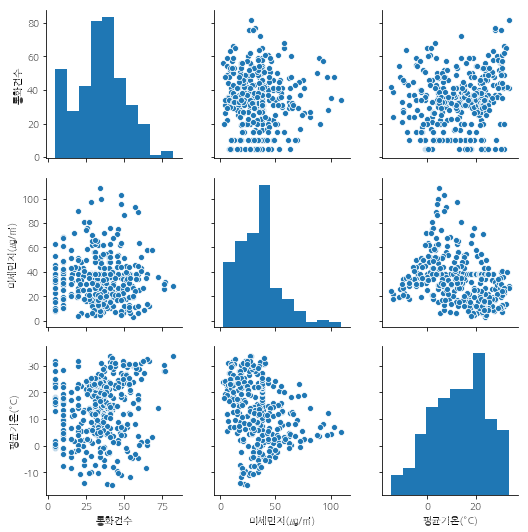

In [31]:
mseoul_ct = test[test.발신지_구 == '강남구']
mseoul_ct2 = mseoul_ct[mseoul_ct.연령 == '10대']
mseoul_ct3 = mseoul_ct2[mseoul_ct2.성별 == '남']
mseoul_ct4 = mseoul_ct3[['일시', '통화건수', '미세먼지(㎍/㎥)','평균기온(°C)']]

print(list(test))

sns.pairplot(mseoul_ct4)
plt.show()

#sns.pairplot(test[['일시', '통화건수', '미세먼지(㎍/㎥)','초미세먼지(㎍/㎥)','평균기온(°C)','일강수량(mm)','month','day','평균 풍속(m/s)','평균 상대습도(%)']])
#plt.show()


#sns.pairplot(test[['통화건수','9-9강수(mm)','이산화질소농도(ppm)','오존농도(ppm)','이산화탄소농도(ppm)','아황산가스(ppm)','안개 계속시간(hr)']])
#plt.show()



##Plot Graph ?


In [0]:
#print(list(test))

#test_d = test.groupby(['일시'], as_index=False).sum()
#test_sex = test.groupby(['성별'], as_index = False).sum()
#test_gu = test.groupby(['발신지_구'], as_index = False).sum()
#test_dong = test.groupby(['발신지_읍면동'], as_index = False).sum()
#test_age = test.groupby(['연령'], as_index = False).sum()
#test_day = test.groupby(['요일'], as_index = False).sum()

#test_month = test.groupby(['month'], as_index = False).sum()

In [0]:
#x = test_month['month']

#performance = test_month['통화건수']
#x_pos = [i for i, _ in enumerate(x)]
#plt.bar(x_pos, performance, color='red')
#plt.xlabel("Month")
#plt.ylabel("Frequency")
#plt.title("Month by frequency")
#plt.xticks(x_pos, x)
#plt.show()

#test_temp = test.groupby(['month'], as_index = False).mean()
#print(test_temp.head(5))

#performance = test_temp['평균기온(°C)']
#print(performance.head())
#x_pos = [i for i, _ in enumerate(x)]
#plt.plot(x, performance, color='red')
#plt.xlabel("Month")
#plt.ylabel("Temperature")
#plt.title("Month VS Temperature")
#plt.show()

#print(test_month['통화건수'])


#performance = test_temp['미세먼지(㎍/㎥)']
#rint(performance.head())
#_pos = [i for i, _ in enumerate(x)]
#plt.plot(x, performance, color='red')
#plt.xlabel("Month")
#plt.ylabel("미세먼지")
#plt.title("Month VS 미세먼지")
#plt.show()


###관계 확인?

현재 결론은 통화건수와 날씨와 직접적인 관계는 찾기 어려움.

Correlation을 해봐도 강한 관계성이 없음.




                      통화건수  평균기온(°C)  ...  초미세먼지(㎍/㎥)     month
통화건수              1.000000  0.044759  ...    0.010125 -0.081068
평균기온(°C)          0.044759  1.000000  ...   -0.220480  0.267224
강수 계속시간(hr)       0.016543  0.098947  ...   -0.147970 -0.018999
일강수량(mm)          0.018433  0.135998  ...   -0.153197  0.026030
평균 풍속(m/s)        0.005834 -0.287631  ...   -0.143070 -0.253977
평균 이슬점온도(°C)      0.053536  0.962968  ...   -0.187172  0.256941
평균 상대습도(%)        0.051414  0.457540  ...   -0.019188  0.111277
평균 증기압(hPa)       0.044637  0.902260  ...   -0.235237  0.213632
평균 현지기압(hPa)     -0.058227 -0.793761  ...    0.180336 -0.003487
가조시간(hr)          0.053908  0.831020  ...   -0.206438 -0.114228
합계 일조 시간(hr)      0.010035  0.115906  ...   -0.079149  0.009602
1시간 최다일사량(MJ/m2)  0.011464  0.462514  ...   -0.180071  0.039716
합계 일사(MJ/m2)      0.023316  0.512609  ...   -0.160310 -0.003530
평균 전운량(1/10)      0.014631  0.221557  ...    0.079142 -0.046100
평균 중하층운량(1/10)    0.030825  0.169670  

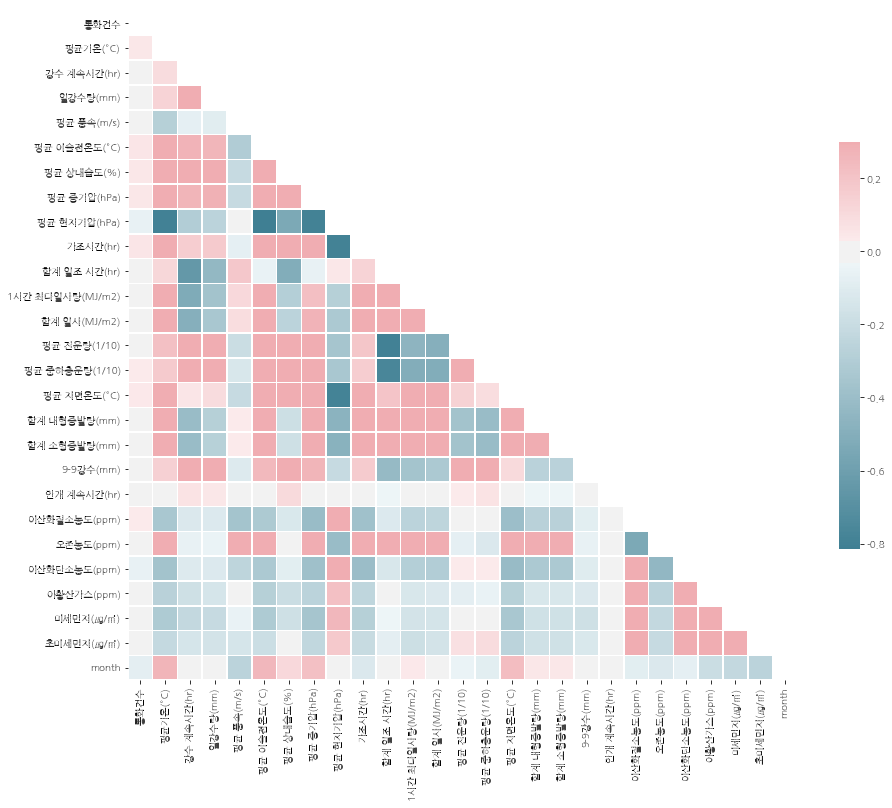

In [33]:
#Correlation test

#Drop some variables.
test2 = test[['일시', '발신지_구', '성별', '연령', '요일', '통화건수', '평균기온(°C)', '강수 계속시간(hr)', '일강수량(mm)', '평균 풍속(m/s)', '평균 이슬점온도(°C)', '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)', '가조시간(hr)', '합계 일조 시간(hr)', '1시간 최다일사량(MJ/m2)', '합계 일사(MJ/m2)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '합계 대형증발량(mm)', '합계 소형증발량(mm)', '9-9강수(mm)', '안개 계속시간(hr)', '이산화질소농도(ppm)', '오존농도(ppm)', '이산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)', 'month']]
    
#.drop(['year'], axis = 1)
#.drop(['일시', '발신지_구', '발신지_시도', '발신지_읍면동', '성별', '연령','요일'], axis=1)
					
print("\n")
corr2 = test2.corr()
print(corr2)

# Generate a mask for the upper triangle

mask2 = np.zeros_like(corr2, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True

# Set up the matplotlib figure

f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap

cmap2 = sns.diverging_palette(220, 10, as_cmap=True)
print(sns.heatmap(corr2, mask=mask2, cmap=cmap2, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}))

export_csv = corr2.to_csv('/gdrive/My Drive/competition/weather/correlation.csv', index = None, header=True, encoding='ms949')

Correlation 강한 경우 : +-0.5 이상만 찍어봄.

(+) : 평균 현지기압, 최고 해면기압, 최저 해면기압, 평균 해면기압 VS 평균기온.
        VS 최저기온
        VS 최고기온
        VS 평균 이슬점온도
        VS 평균 공기압
        
        
       가조시간, 평균 지면온도, 평균 초상온도, 평균 5cm, 10, 20, 30, 0.5,1,1.5 지중온도
       VS 평균 현지기압
       VS 최고 해면기압
       VS 최저 해면기압
       VS 평균 해면기압
       
       가조시간 VS 5m 지중온도
       
       평균 진운량 VS 합계 일조 시간
       평균 중하층운량 VS 합계 일조 시간
       
###상기 변수들에서 선택해 보는 것이 좋을 듯.


###추가로 서울시 미세먼지 관련 데이터를 추가해서 알아보는 것도 좋을 듯 싶다.

##One Hot Encoding - Data modification

---

One hot encoding이란 Dummy variable을 만드는 것이다. 가령 예를 들면 남/녀를 구분지어야 할 경우, 남자 변수와 여자 변수를 따로 만들어주고 해당 데이터의 성별이 남자면 남자에 1, 여자라면 여자에 1이 들어가는 구조다.

In [34]:
# One-hot encode the data using pandas get_dummies
#이 부분 고쳐야함

test_ohe = test2.drop(['일시'], axis =1)
test_ohe_date = test2['일시']
print(list(test_ohe))

test_datein = test_ohe
test_datein['일시'] = test_ohe_date

#test_ohe = test2.drop(['일시','발신지_읍면동'], axis =1)
print(test_ohe.head(10))
test_ohe = test_ohe.drop(['일시'], axis = 1)
print(test_ohe.head(10))

test_ohe = pd.get_dummies(test_ohe)
print(list(test_ohe))
print(test_ohe.head(5))

#We could simply map days if the week to numbers 1–7, but this might lead to the algorithm placing more importance on Sunday because it has a higher numerical value.

['발신지_구', '성별', '연령', '요일', '통화건수', '평균기온(°C)', '강수 계속시간(hr)', '일강수량(mm)', '평균 풍속(m/s)', '평균 이슬점온도(°C)', '평균 상대습도(%)', '평균 증기압(hPa)', '평균 현지기압(hPa)', '가조시간(hr)', '합계 일조 시간(hr)', '1시간 최다일사량(MJ/m2)', '합계 일사(MJ/m2)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)', '합계 대형증발량(mm)', '합계 소형증발량(mm)', '9-9강수(mm)', '안개 계속시간(hr)', '이산화질소농도(ppm)', '오존농도(ppm)', '이산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)', 'month']
  발신지_구 성별     연령 요일  ...  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)  month          일시
0   강남구  남    10대  월  ...       34.0        22.0      1  2018-01-01
1   강남구  남    20대  월  ...       34.0        22.0      1  2018-01-01
2   강남구  남    30대  월  ...       34.0        22.0      1  2018-01-01
3   강남구  남    40대  월  ...       34.0        22.0      1  2018-01-01
4   강남구  남    50대  월  ...       34.0        22.0      1  2018-01-01
5   강남구  남  60대이상  월  ...       34.0        22.0      1  2018-01-01
6   강남구  여    10대  월  ...       34.0        22.0      1  2018-01-01
7   강남구  여    20대  월  ...       34.0  

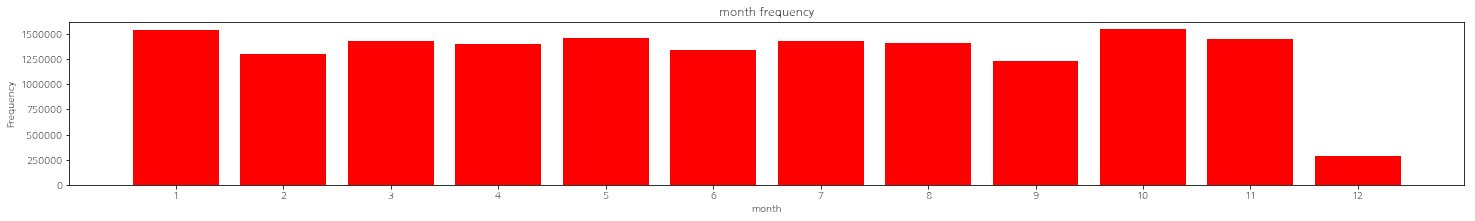

평균기온(°C)    0
통화건수        0
dtype: int64
통화건수        15826350.0
평균기온(°C)        4745.9
dtype: float64


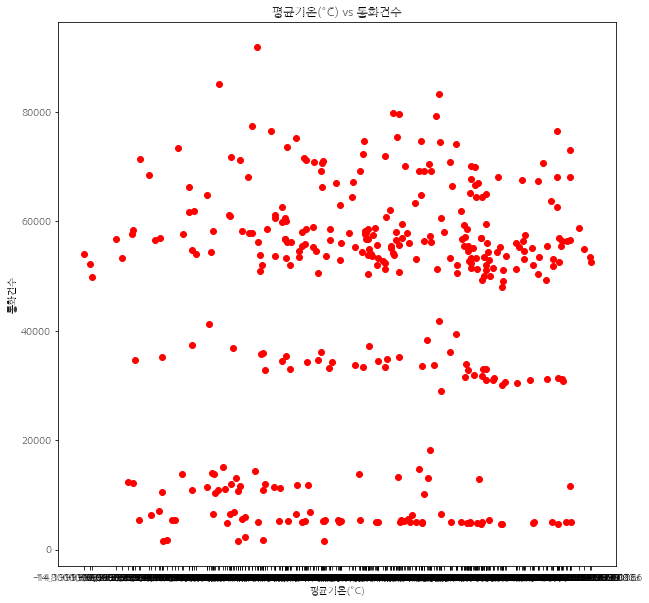

평균기온(°C)    0
통화건수        0
dtype: int64
통화건수        15826350.0
평균기온(°C)      118662.5
dtype: float64
                  통화건수  평균기온(°C)
일시         발신지_구                
2018-01-01 강남구     757      -1.3
           강동구     496      -1.3
           강북구     642      -1.3
           강서구    1109      -1.3
           관악구     115      -1.3
15826350


              통화건수  평균기온(°C)
통화건수      1.000000  0.071346
평균기온(°C)  0.071346  1.000000


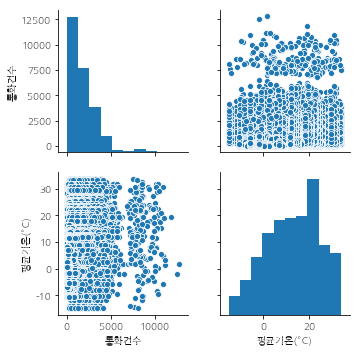

In [35]:
#Month VS number of calls

test_ohe_d = test_datein.groupby(['month'], as_index=False).sum()
#print(test_ohe_d.head(12))
x = test_ohe_d['month']
performance = test_ohe_d['통화건수']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(25, 3))
plt.bar(x_pos, performance, color='red')
plt.xlabel("month")
plt.ylabel("Frequency")
plt.title("month frequency")
plt.xticks(x_pos, x)
#plt.xticks(rotation=90)
plt.show()

#print(test_ohe_d.tail())

#print(test_ohe_d['통화건수'].sum())

#15826350

#Number of calls VS temperature.




#기온과 통화건수
#기온의 높낮이는 통화건수와 관련이 없다.?

test_ohd_temp1 = test_datein[['일시', '통화건수']]
test_ohd_temp1_1 =test_ohd_temp1.groupby(['일시']).sum()
test_ohd_temp2 = test_datein[['일시', '평균기온(°C)']]
test_ohd_temp3 = test_ohd_temp2.groupby(['일시']).mean()
test_ohd_temp = pd.merge(test_ohd_temp1_1, test_ohd_temp3, on = ['일시'], how = 'left') 
print(test_ohd_temp.isna().sum().sort_values(ascending = False))
print(test_ohd_temp.sum())

x = test_ohd_temp['평균기온(°C)']

performance = test_ohd_temp['통화건수']
x_pos = x
plt.figure(figsize=(10,10))
plt.scatter(x_pos, performance, color='red')
plt.xlabel("평균기온(°C)")
plt.ylabel("통화건수")
plt.title("평균기온(°C) vs 통화건수")
plt.xticks(x_pos, x)
plt.show()


test_ohd_t1 = test_datein[['일시', '통화건수', '발신지_구']]
test_ohd_t1_1 =test_ohd_t1.groupby(['일시', '발신지_구']).sum()
test_ohd_t2 = test_datein[['일시', '평균기온(°C)','발신지_구']]
test_ohd_t3 = test_ohd_t2.groupby(['일시','발신지_구']).mean()
test_ohd_t = pd.merge(test_ohd_t1_1, test_ohd_t3, on = ['일시', '발신지_구'], how = 'left') 
print(test_ohd_t.isna().sum().sort_values(ascending = False))
print(test_ohd_t.sum())

print(test_ohd_t.head())
print(test_ohd_t['통화건수'].sum())

print("\n")
corr2 = test_ohd_t.corr()
print(corr2)

#날씨와 통화건수의 관계에서 Correlation이 정말 적다는 것은 쫌 거시기함...

sns.pairplot(test_ohd_t)
plt.show()



In [0]:
#Regression with all variables
X = test_ohe.drop(['통화건수'], axis = 1) #, '발신지_구',	'발신지_시도',	'발신지_읍면동','성별',	'연령',	'요일'], axis=1) # Will fix this later.
y = test_ohe[['통화건수']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                  random_state=1)

#Regression

In [37]:
reg = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
reg.fit(X_train, y_train)
y_predicted = y_pred = reg.predict(X_test)

#print("Mean squared error Train: %.2f" % mean_squared_error(y_train, y_predicted))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))
#print('R²train: %.2f' % r2_score(y_train, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))

#To retrieve the intercept:
print("Regression intercept ", reg.intercept_)
#For retrieving the slope:
print("Regression slope ", reg.coef_)

print(reg)

print(list(test_ohe))


Mean squared error: 15597.56
R²: 0.57
Regression intercept  [214.44299258]
Regression slope  [[ 2.94372250e+00 -9.06958324e-01  5.94306447e-01  5.27937743e+00
   1.88831161e+00  2.61421987e-01 -3.38982893e+00  1.14363177e-01
  -9.25045777e+00  8.76610166e-01 -1.73973698e+01  3.25919979e+00
  -2.06139542e+00 -3.66706889e-01  1.49770295e+00 -2.44910149e+01
   3.07756049e+00 -5.84855793e-01 -1.22390990e+01  6.76121809e+02
   5.46526536e+01 -2.64109553e+01 -4.78194192e+03  4.39524835e-01
  -7.06702835e-01 -9.68685953e+00  3.79466081e+02  1.93960805e+00
   1.31083859e+01  1.06889999e+02 -1.98303141e+01 -1.34484086e+02
  -1.94705010e+01 -6.51287598e+01  2.20434499e+01 -1.34807025e+02
  -1.95352070e+01 -5.90141339e+01 -5.26819142e+01  3.68688013e+01
   1.27417950e+02  2.06376963e+01 -5.34456799e+01  5.58747878e+01
  -1.25375472e+02  4.36323386e+01 -2.60905379e+01 -4.39221587e+01
  -9.21055980e+01  8.34706553e+01 -4.54583649e+01 -4.74673385e+01
   4.74673385e+01 -1.43264989e+02 -2.64030392e+01

#Decision Tree

In [38]:
from sklearn import tree
from sklearn.tree import export_graphviz
import pydot

DecTree = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
#probably around 20 ~ 25




clt = DecTree.fit(X_train, y_train)

pred = DecTree.predict(X_test)
pred_proba = DecTree.predict_proba(X_test)

#print("Mean squared error Train: %.2f" % mean_squared_error(y_train, pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
#print('R²train: %.2f' % r2_score(y_train, pred))
print('R²: %.2f' % r2_score(y_test, pred))

#tree.plot_tree(clt)
#오래걸림...




Mean squared error: 5818.95
R²: 0.84


In [0]:
#plt.figure(figsize=(25, 3))
#treexample = tree.plot_tree(clt.fit(X_train, y_train)) 

In [40]:
DecTreeR = tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)
clt = DecTreeR.fit(X_train, y_train)
pred = DecTreeR.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))

print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
print('R²: %.2f' % r2_score(y_test, pred))
#tree.plot_tree(clt)
#tree.export_graphviz(clt)

Mean squared error: 5088.26
Mean squared error: 5088.26
R²: 0.86


#Decision Tree Regression has better R square than Decision Tree.

Also, DecisionTree Regression's MSE is better than DecisionTree MSE.

Mean squared error: 5667.44

R²: 0.84


Decision Tree Regression

Mean squared error: 4890.28

R²: 0.87


#XGBoost Regression

In [41]:
import xgboost as xgb
from xgboost import XGBClassifier

#xgbmodel = xgb.XGBRegressor()
xgbmodel = xgb.XGBRegressor(max_depth=7, learning_rate=0.05, n_estimators=400,
                     silent=True, objective='reg:linear', booster='gbtree',
                     n_jobs=1, nthread=None, gamma=0, min_child_weight=1,
                     max_delta_step=0, subsample=1, colsample_bytree=1,
                     colsample_bylevel=1, reg_alpha=0, reg_lambda=1,
                     scale_pos_weight=1, base_score=0.5, random_state=0,
                     seed=None, missing=None)

#colsample_bytree = 0.4603, gamma = 0.0468, learning_rate = 0.05, max_depth = 3, min_child_weight = 1.7817, n_estimators = 2200, reg_alpha = 0.4640, reg_lambda = 0.8571, subsample = 0.5213, silent = 1, random_state = 7, nthread = -1
#xgbmodel = XGBClassifier()

#eval_set  = [(X_train,y_train), (X_test,y_test)]
xgbmodel.fit(X_train, y_train, eval_set  = [(X_train,y_train), (X_test,y_test)], eval_metric=["error", "rmse"],early_stopping_rounds=65)



[0]	validation_0-error:-148.406	validation_0-rmse:235.003	validation_1-error:-148.304	validation_1-rmse:232.799
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 65 rounds.
[1]	validation_0-error:-148.406	validation_0-rmse:226.02	validation_1-error:-148.304	validation_1-rmse:224.104
[2]	validation_0-error:-148.406	validation_0-rmse:217.592	validation_1-error:-148.304	validation_1-rmse:215.954
[3]	validation_0-error:-148.406	validation_0-rmse:209.686	validation_1-error:-148.304	validation_1-rmse:208.303
[4]	validation_0-error:-148.406	validation_0-rmse:202.286	validation_1-error:-148.304	validation_1-rmse:201.149
[5]	validation_0-error:-148.406	validation_0-rmse:195.362	validation_1-error:-148.304	validation_1-rmse:194.362
[6]	validation_0-error:-148.406	validation_0-rmse:188.857	validation_1-error:-148.304	validation_1-rmse:188.087
[7]	validation_0-error:-148.406	validation_0-rmse:182.706	

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [42]:
y_pred = xgbmodel.predict(X_test)
#predictions = [round(value) for value in y_pred]

print(xgbmodel)
#print("Mean squared error Train: %.2f" % mean_squared_error(y_train, pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
#print('R²train: %.2f' % r2_score(y_train, pred))
print('R²: %.2f' % r2_score(y_test, pred))


#print('Coefficient' % xgbmodel.coef_)





#accuracy = accuracy_score(y_test, predictions)

#print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
#thresholds = sort(model.feature_importances_)
#for thresh in thresholds:
	# select features using threshold
#	selection = SelectFromModel(model, threshold=thresh, prefit=True)
#	select_X_train = selection.transform(X_train)
	# train model
#	selection_model = XGBClassifier()
#	selection_model.fit(select_X_train, y_train)
	# eval model
#	select_X_test = selection.transform(X_test)
#	y_pred = selection_model.predict(select_X_test)
#	predictions = [round(value) for value in y_pred]
#	accuracy = accuracy_score(y_test, predictions)
#	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)
Mean squared error: 5088.26
R²: 0.86


## XGBOOST Variable Importance

어떤 변수가 중요하게 사용되었는지를 알아보기 위해 다음과 같은 코드를 실행한다.

In [43]:
#from sklearn.metrics import average_precision_score, roc_auc_score, mean_absolute_error
xgbmodel.feature_importances_

array([1.69334328e-03, 9.69884335e-04, 9.62282997e-04, 1.62291655e-03,
       1.58652395e-03, 1.82950799e-03, 1.22412457e-03, 1.14048447e-03,
       7.76393618e-03, 1.92510197e-03, 2.00111326e-03, 2.68507679e-03,
       2.62769428e-03, 2.07068981e-03, 1.10181840e-03, 1.04396022e-03,
       1.72911852e-03, 3.44837527e-03, 7.01124809e-05, 3.12872324e-03,
       7.32888817e-04, 1.11952855e-03, 4.12409427e-04, 9.90498229e-04,
       1.20670348e-03, 1.45621346e-02, 1.47360429e-01, 5.41643193e-03,
       8.78564175e-03, 6.72281981e-02, 5.00431424e-03, 8.69416669e-02,
       1.04252435e-03, 7.77889369e-03, 1.14322649e-02, 6.56958222e-02,
       2.79777730e-03, 6.10731961e-03, 1.16539346e-02, 1.52819222e-02,
       6.70698360e-02, 1.68218799e-02, 1.21811209e-02, 3.95506918e-02,
       6.04687892e-02, 1.48345055e-02, 1.25202979e-03, 7.61868805e-03,
       4.54184972e-02, 3.87655273e-02, 1.70648918e-02, 2.02813819e-02,
       0.00000000e+00, 2.87120342e-02, 7.64267053e-03, 1.70688778e-02,
      

위의 코드로는 어떤 변수가 중요한지 알아먹을 수가 없으니 matplotlib을 사용하여 그래프화한다.

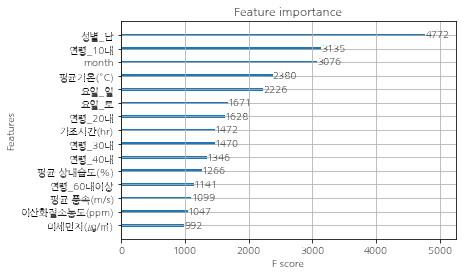

In [44]:
from xgboost import plot_importance
from matplotlib import pyplot


plot_importance(xgbmodel,max_num_features=15, grid=True, show_values=True)
pyplot.show()

위와같이 성별, Month, 10대 연령, 요일, 평균기온 순의 중요도가 나온다. 평균기온은 어느정도 중요한 모양.

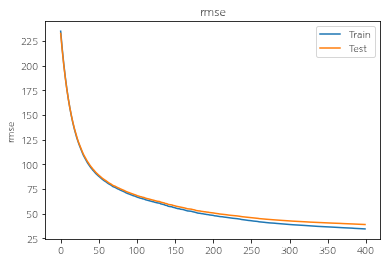

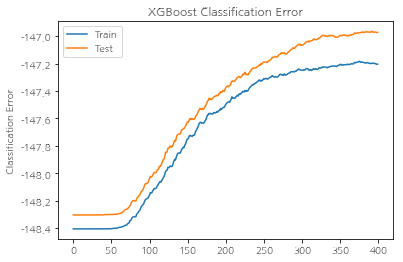

In [45]:
results = xgbmodel.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('rmse')
pyplot.title('rmse')
pyplot.show()

#plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

60~90 사이의 tree를 실행하는 것이 최적인 듯 하다. Overfitting 걱정도 없는 듯.